In [22]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import clear_output
from time import sleep
import os
import cv2

from tensorflow.keras.layers import Dense, Conv2D, Activation, Flatten, Dropout, GlobalAveragePooling2D, MaxPooling2D
from tensorflow.keras.models import Sequential, Model

from tensorflow.keras.optimizers import SGD, Adam

In [46]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

img_size = 299
cam = cv2.VideoCapture(0)

cv2.namedWindow("Test Detection")
img_counter = 0

while(True):
    ret, frame = cam.read()
    faces = face_cascade.detectMultiScale(frame, 1.3, 5)
    for (x,y,w,h) in faces:
        if w > 130:
            detected_face = frame[int(y):int(y+h), int(x):int(x+w)]
            cv2.imshow("Test", detected_face)
    if not ret:
        print("OO")
        break
    k = cv2.waitKey(1)
    
    if k%256 == 27:
        print("Hit ESC to skipe and hit Space bar to save image")
        break
    elif k%256 == 32:
        faceresize = cv2.resize(detected_face, (img_size,img_size))
        img_name = "dataset/test/test_image_{}.jpg".format(img_counter)
        cv2.imwrite(img_name, faceresize)
        img_counter += 1
         
cam.release()
cv2.destroyAllWindows()

Hit ESC to skipe and hit Space bar to save image


In [47]:
train_path = 'train_imgface.csv'
test_path = 'test_imgface.csv'
train_data = pd.read_csv(train_path)  
test_data = pd.read_csv(test_path)

In [48]:
train_data.head()

,0x,0y,1x,1y,2x,2y,3x,3y,4x,4y,...,11y,12x,12y,13x,13y,14x,14y,15x,15y,image
0,88.0,130.0,104.0,129.0,119.0,129.0,191.0,123.0,206.0,124.0,...,180.0,238.0,252.0,175.0,295.0,95.0,268.0,59.0,205.0,training_image_1.jpg
1,78.0,121.0,99.0,118.0,117.0,120.0,183.0,120.0,203.0,117.0,...,186.0,219.0,267.0,151.0,298.0,87.0,291.0,46.0,213.0,training_image_10.jpg
2,79.0,122.0,99.0,119.0,116.0,122.0,187.0,122.0,204.0,120.0,...,164.0,227.0,254.0,159.0,293.0,82.0,271.0,42.0,204.0,training_image_11.jpg
3,75.0,123.0,95.0,119.0,111.0,119.0,181.0,117.0,200.0,118.0,...,186.0,222.0,261.0,162.0,297.0,73.0,269.0,39.0,209.0,training_image_12.jpg
4,78.0,128.0,95.0,124.0,111.0,126.0,182.0,125.0,201.0,121.0,...,181.0,226.0,256.0,161.0,293.0,82.0,277.0,43.0,215.0,training_image_13.jpg


In [86]:
train_data = train_data.fillna(-1)

In [87]:
test_data = test_data.fillna(-1)

In [49]:
train_data.shape[1]

33

In [50]:
test_data.head()

,0x,0y,1x,1y,2x,2y,3x,3y,4x,4y,...,11y,12x,12y,13x,13y,14x,14y,15x,15y,image
0,88.0,115.0,100.0,115.0,118.0,115.0,191.0,118.0,210.0,119.0,...,174.0,222.0,260.0,179.0,294.0,87.0,288.0,36.0,220.0,test_image_0.jpg
1,84.0,123.0,99.0,121.0,114.0,122.0,187.0,124.0,206.0,120.0,...,174.0,233.0,258.0,161.0,296.0,94.0,284.0,50.0,213.0,test_image_1.jpg
2,78.0,113.0,96.0,112.0,117.0,117.0,188.0,116.0,207.0,115.0,...,270.0,150.0,297.0,66.0,273.0,45.0,205.0,NaN,NaN,test_image_10.jpg
3,98.0,133.0,117.0,134.0,135.0,133.0,204.0,127.0,226.0,126.0,...,186.0,255.0,267.0,187.0,296.0,108.0,285.0,65.0,216.0,test_image_11.jpg
4,97.0,133.0,119.0,131.0,138.0,134.0,210.0,126.0,228.0,127.0,...,200.0,257.0,271.0,181.0,297.0,118.0,290.0,74.0,226.0,test_image_12.jpg


In [88]:
coltrn = train_data['image']
imgs = []
print(coltrn.shape[0])
training = train_data.drop('image',axis = 1)
Y_train = []
for i in range (coltrn.shape[0]):
    p = os.path.join(os.getcwd(), 'dataset/train/'+str(coltrn.iloc[i]))

    img = cv2.imread(p, 1)
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    imgs.append(gray_img)
    
    y = training.iloc[i,:]
    Y_train.append(y)

X_train = np.asarray(imgs)

Y_train = np.array(Y_train,dtype = 'float')  

print(X_train.shape, Y_train.shape)

31
(31, 299, 299) (31, 32)


In [89]:
X_train

array([[[118, 115, 110, ..., 243, 229, 221],
        [114, 113, 112, ..., 248, 235, 228],
        [115, 115, 115, ..., 250, 242, 238],
        ...,
        [127, 128, 129, ...,   9,   9,   9],
        [127, 128, 129, ...,   9,   9,   9],
        [127, 128, 129, ...,   9,   9,   9]],

       [[128, 130, 132, ..., 138, 136, 135],
        [129, 127, 123, ..., 116, 114, 113],
        [128, 121, 110, ...,  87,  86,  85],
        ...,
        [ 24,  24,  24, ...,  18,  19,  22],
        [ 23,  23,  23, ...,  17,  18,  19],
        [ 23,  22,  23, ...,  18,  18,  17]],

       [[125, 116, 107, ...,  48,  45,  43],
        [117, 113, 107, ...,  45,  44,  43],
        [107, 107, 105, ...,  42,  42,  43],
        ...,
        [ 18,  18,  18, ...,  21,  21,  21],
        [ 19,  18,  18, ...,  21,  21,  21],
        [ 19,  19,  18, ...,  22,  21,  21]],

       ...,

       [[127, 125, 123, ...,  53,  36,  25],
        [127, 125, 122, ...,  72,  53,  41],
        [130, 126, 121, ..., 102,  81,  66

In [90]:
Y_train

array([[ 88., 130., 104., 129., 119., 129., 191., 123., 206., 124., 220.,
        123., 159., 172., 127., 230., 168., 237., 195., 221., 164., 214.,
        255., 180., 238., 252., 175., 295.,  95., 268.,  59., 205.],
       [ 78., 121.,  99., 118., 117., 120., 183., 120., 203., 117., 228.,
        116., 160., 165., 100., 231., 151., 290., 199., 238., 155., 200.,
        250., 186., 219., 267., 151., 298.,  87., 291.,  46., 213.],
       [ 79., 122.,  99., 119., 116., 122., 187., 122., 204., 120., 221.,
        123., 160., 174.,  99., 213., 152., 237., 199., 213., 155., 207.,
        247., 164., 227., 254., 159., 293.,  82., 271.,  42., 204.],
       [ 75., 123.,  95., 119., 111., 119., 181., 117., 200., 118., 217.,
        121., 165., 170., 127., 225., 165., 232., 162., 209., 193., 218.,
        244., 186., 222., 261., 162., 297.,  73., 269.,  39., 209.],
       [ 78., 128.,  95., 124., 111., 126., 182., 125., 201., 121., 218.,
        125., 157., 173., 111., 225., 156., 235., 191., 21

In [91]:
coltst = test_data['image']
imgstst = []
print (coltst.shape[0])
testing = test_data.drop('image',axis = 1)
Y_test = []
for i in range (coltst.shape[0]):
    p = os.path.join(os.getcwd(), 'dataset/test/'+str(coltst.iloc[i]))
    imgtst = cv2.imread(p, 1)
    gray_imgtst = cv2.cvtColor(imgtst, cv2.COLOR_BGR2GRAY)
    imgstst.append(gray_imgtst)
    
    y = testing.iloc[i,:]
    Y_test.append(y)

X_test = np.asarray(imgstst)

Y_test = np.array(Y_test,dtype = 'float')  

print(X_test.shape, Y_test.shape)

18
(18, 299, 299) (18, 32)


In [92]:
Y_trainx = training.loc[:,['0x','1x','2x','3x','4x','5x','6x','7x','8x','9x','10x','11x','12x','13x','14x','15x']] 
Y_trainy = training.loc[:,['0y','1y','2y','3y','4y','5y','6y','7y','8y','9y','10y','11y','12y','13y','14y','15y']] 

print(Y_trainx.shape, Y_trainy.shape)
Y_trainx.head()

(31, 16) (31, 16)


,0x,1x,2x,3x,4x,5x,6x,7x,8x,9x,10x,11x,12x,13x,14x,15x
0,88.0,104.0,119.0,191.0,206.0,220.0,159.0,127.0,168.0,195.0,164.0,255.0,238.0,175.0,95.0,59.0
1,78.0,99.0,117.0,183.0,203.0,228.0,160.0,100.0,151.0,199.0,155.0,250.0,219.0,151.0,87.0,46.0
2,79.0,99.0,116.0,187.0,204.0,221.0,160.0,99.0,152.0,199.0,155.0,247.0,227.0,159.0,82.0,42.0
3,75.0,95.0,111.0,181.0,200.0,217.0,165.0,127.0,165.0,162.0,193.0,244.0,222.0,162.0,73.0,39.0
4,78.0,95.0,111.0,182.0,201.0,218.0,157.0,111.0,156.0,191.0,159.0,247.0,226.0,161.0,82.0,43.0


In [93]:
Y_testx = testing.loc[:,['0x','1x','2x','3x','4x','5x','6x','7x','8x','9x','10x','11x','12x','13x','14x','15x']] 
Y_testy = testing.loc[:,['0y','1y','2y','3y','4y','5y','6y','7y','8y','9y','10y','11y','12y','13y','14y','15y']] 

print(Y_testx.shape, Y_testy.shape)
Y_testx.head()

(18, 16) (18, 16)


,0x,1x,2x,3x,4x,5x,6x,7x,8x,9x,10x,11x,12x,13x,14x,15x
0,88.0,100.0,118.0,191.0,210.0,223.0,182.0,113.0,170.0,205.0,168.0,240.0,222.0,179.0,87.0,36.0
1,84.0,99.0,114.0,187.0,206.0,222.0,162.0,111.0,154.0,191.0,154.0,251.0,233.0,161.0,94.0,50.0
2,78.0,96.0,117.0,188.0,207.0,228.0,99.0,142.0,197.0,149.0,262.0,236.0,150.0,66.0,45.0,-1.0
3,98.0,117.0,135.0,204.0,226.0,246.0,181.0,137.0,180.0,217.0,178.0,277.0,255.0,187.0,108.0,65.0
4,97.0,119.0,138.0,210.0,228.0,245.0,177.0,141.0,181.0,212.0,174.0,278.0,257.0,181.0,118.0,74.0


In [94]:
X_train[0].shape

(299, 299)

In [95]:
Y_trainx.iloc[0,:]

0x      88.0
1x     104.0
2x     119.0
3x     191.0
4x     206.0
5x     220.0
6x     159.0
7x     127.0
8x     168.0
9x     195.0
10x    164.0
11x    255.0
12x    238.0
13x    175.0
14x     95.0
15x     59.0
Name: 0, dtype: float64

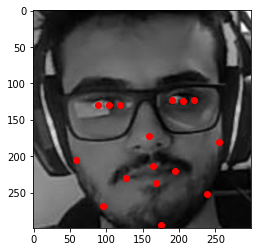

In [96]:
x0=Y_trainx.iloc[0,:]
y0=Y_trainy.iloc[0,:]
plt.imshow(np.squeeze(X_train[0]),cmap='gray')
plt.scatter(x0, y0,color ='red')
plt.show()

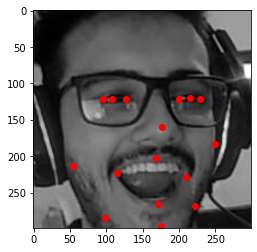

In [97]:
x0t=Y_testx.iloc[6,:]
y0t=Y_testy.iloc[6,:]
plt.imshow(np.squeeze(X_test[6]),cmap='gray')
plt.scatter(x0t, y0t,color ='red')
plt.show()

In [129]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(299,299,1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(500, activation='relu'))
model.add(Dense(500, activation='relu'))

model.add(Dense(32))

In [130]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 299, 299, 32)      320       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 147, 147, 64)      18496     
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 145, 145, 64)      36928     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 72, 72, 64)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 72, 72, 64)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 70, 70, 128)      

In [131]:
adam = Adam(lr=0.001)
model.compile(adam, loss='mean_squared_error', metrics=['accuracy'])

In [132]:
batchsize = 4
X_train= X_train.reshape(31,299,299,1)
X_test= X_test.reshape(18,299,299,1)
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(31, 299, 299, 1) (31, 32) (18, 299, 299, 1) (18, 32)


In [133]:
history = model.fit(X_train, Y_train, validation_data=(X_test,Y_test), epochs=20, batch_size=batchsize)

Epoch 1/20
8/8 [==============================] - 2s 218ms/step - loss: 193171.6819 - accuracy: 0.0000e+00 - val_loss: 33829.3555 - val_accuracy: 0.0556
Epoch 2/20
8/8 [==============================] - 2s 194ms/step - loss: 31171.0082 - accuracy: 0.0000e+00 - val_loss: 15421.5264 - val_accuracy: 0.0000e+00
Epoch 3/20
8/8 [==============================] - 2s 199ms/step - loss: 9085.7696 - accuracy: 0.0000e+00 - val_loss: 2562.5320 - val_accuracy: 0.0000e+00
Epoch 4/20
8/8 [==============================] - 2s 205ms/step - loss: 4255.1284 - accuracy: 0.3061 - val_loss: 1226.8998 - val_accuracy: 0.9444
Epoch 5/20
8/8 [==============================] - 2s 201ms/step - loss: 1428.8923 - accuracy: 0.9889 - val_loss: 2742.0964 - val_accuracy: 0.9444
Epoch 6/20
8/8 [==============================] - 2s 202ms/step - loss: 1088.7855 - accuracy: 0.9928 - val_loss: 3432.7344 - val_accuracy: 0.9444
Epoch 7/20
8/8 [==============================] - 2s 198ms/step - loss: 1395.5689 - accuracy: 0.948

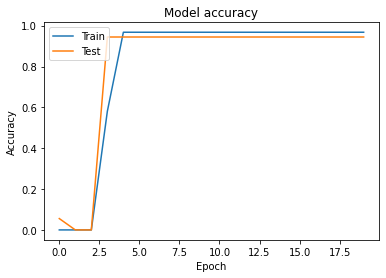

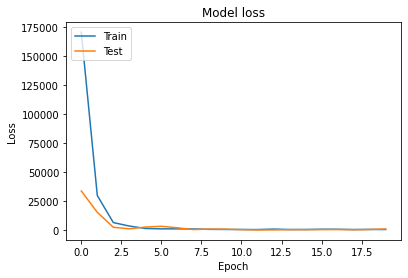

In [134]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [135]:
y_val = model.predict(X_test)
yvalx = y_val[::1,::2]
yvaly = y_val[:, 1::2]

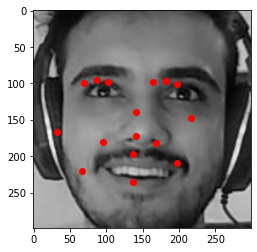

In [138]:
plt.imshow(np.squeeze(X_test[2]),cmap='gray')
plt.scatter(yvalx[6], yvaly[2], color = 'red')

plt.show()